In [3]:
import torch as t
from matplotlib import pyplot as plt


In [12]:
t.manual_seed=True
x_0=t.linspace(-1,1,100)
X=t.reshape(x_0,(100,1))
Y=3*X.pow(2)+2+0.2*t.rand(X.size())
# print(X)
# print(Y)

随机生成要拟合的样本数据,$Y=3*x^2+2+noise$,其中X,Y都是100*1,的矩阵数据,估计$w,b$

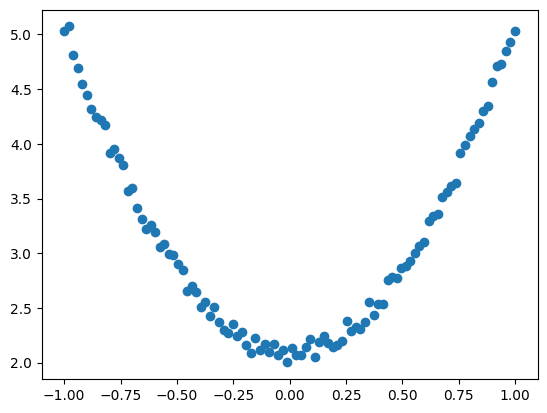

In [14]:
plt.scatter(X.numpy(),Y.numpy())
plt.show()

随机初始化权重参数:$w,b$,自动求导设置为True

In [16]:
w=t.randn(1,1,dtype=t.float,requires_grad=True)
b=t.randn(1,1,dtype=t.float,requires_grad=True)
w

tensor([[-1.0020]], requires_grad=True)

开始训练:

In [17]:
lr=0.001

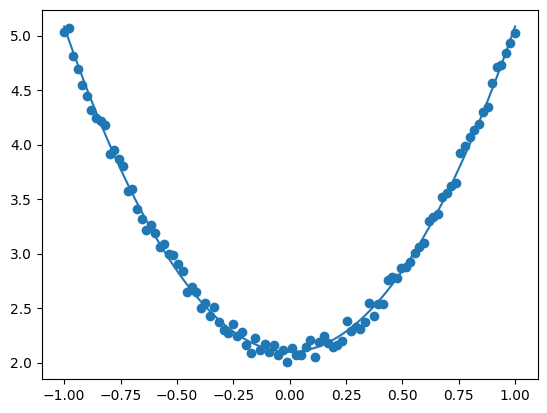

In [18]:
for epoch in range(1000):
    Y_pred=X.pow(2).mm(w)+b
    loss=0.5*(Y_pred-Y)**2
    loss=loss.sum()
    loss.backward()
    with t.no_grad():
        w-=lr*w.grad
        b-=lr*b.grad
        w.grad.zero_()
        b.grad.zero_()
plt.plot(X.numpy(),Y_pred.detach().numpy())
plt.scatter(X.numpy(),Y.numpy())
plt.show()